# Final Project - Piano Roll Extraction -SRC
- Course: AAI-511-Neural Networks
- Institution: University of San Diego
- Professor: Kahila Mokhtari Jadid
- Group 4 Members: 
    * Lucas Young
    * Titouan Margret
    * Juan Pablo Triana Martinez

This notebook has the intention to follow `data_piano_roll_extraction.ipynb`, but using `src` folder with all functions and classes

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import os

path = Path().resolve().parent
notebook_path = str(path)
print(path)
print(path.exists())
sys.path.insert(1, notebook_path) 

C:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4
True


In [2]:
#Import necessary modules
import os
import numpy as np
import kagglehub
from src import DataRetriever, MidiPreprocesser, MidiToNumpy, obtain_piano_rolls, PianoRollsDiscreteEqualizer

### Donwload data

In [3]:
# Obtain current path and data folder path
curr_path = Path.cwd()
download_path = curr_path.parent / "data"
data_path = download_path / "final_proj_data"

#Setup download path to specific data fold (GENUIENLY, Why Kaggelhub :) )
os.environ["KAGGLEHUB_CACHE"] = download_path.__str__()

if download_path.exists():
    print(f"{download_path}: Already exists, no need to create a new one")
else:
    download_path.mkdir(parents=True, exist_ok=True)

if data_path.exists():
    print(f"{data_path}: Already exists, no need to create a new one")
else:
    data_path.mkdir(parents=True, exist_ok=True)

# Download latest version
# path = kagglehub.dataset_download("blanderbuss/midi-classic-music")
# print("Path to dataset files:", path)

c:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4\data: Already exists, no need to create a new one
c:\Users\ajedr\OneDrive\Documentos\Masters_Post_Cert_AI_Stanford_USD_2023_2026\Masters_AI_Workspace\src\MSAAI-511-group-4\data\final_proj_data: Already exists, no need to create a new one


In [4]:
midipreprocesser = MidiPreprocesser(data_path = data_path)
midiobj, labels_composer = midipreprocesser.get_midi_info()

Reading_final_proj_data files...: 0it [00:00, ?it/s]


Reading_Bach files...: 100%|██████████| 122/122 [00:04<00:00, 25.36it/s]
Reading composers..: 2it [00:04,  2.42s/it]

Anhang 14-3.mid cannot be read, is skipped


Reading_Mozart files...: 100%|██████████| 90/90 [00:04<00:00, 19.64it/s]
Reading composers..: 5it [00:24,  4.81s/it]


In [5]:
list_np_arrays, list_composer_names, list_song_names = obtain_piano_rolls(midiobject = midiobj)

Creating Piano roll: Bwv0537 Fantasia and Fugue: 100%|██████████| 3018/3018 [00:00<00:00, 52004.69it/s]
Creating Piano roll: Bwv0538 Toccata and Fugue ''Dorian'': 100%|██████████| 5846/5846 [00:00<00:00, 103033.02it/s]
Creating Piano roll: Bwv0551 Prelude and Fugue: 100%|██████████| 1968/1968 [00:00<00:00, 206535.31it/s]
Creating Piano roll: Bwv0552 Prelude and Fugue ''St. Anne'': 100%|██████████| 6439/6439 [00:00<00:00, 103382.09it/s]
Creating Piano roll: Bwv0554 Short Prelude and Fugue n2 (Spurious): 100%|██████████| 1256/1256 [00:00<00:00, 139237.37it/s]
Creating Piano roll: Bwv0555 Short Prelude and Fugue n3 (Spurious): 100%|██████████| 968/968 [00:00<00:00, 83726.93it/s]
Creating Piano roll: Bwv0556 Short Prelude and Fugue n4 (Spurious): 100%|██████████| 1256/1256 [00:00<00:00, 150722.30it/s]
Creating Piano roll: Bwv0557 Short Prelude and Fugue n5 (Spurious): 100%|██████████| 937/937 [00:00<00:00, 155658.38it/s]
Creating Piano roll: Bwv0558 Short Prelude and Fugue n6 (Spurious): 1

In [6]:
equalizer = PianoRollsDiscreteEqualizer(piano_rolls = list_np_arrays)
eq_piano_rolls = equalizer.get_equalized()
print(eq_piano_rolls.shape)

Equalizing piano rolls...:   0%|          | 0/480 [00:00<?, ?it/s]

Equalizing piano rolls...: 100%|██████████| 480/480 [00:00<00:00, 887.49it/s] 


(480, 128, 2515)


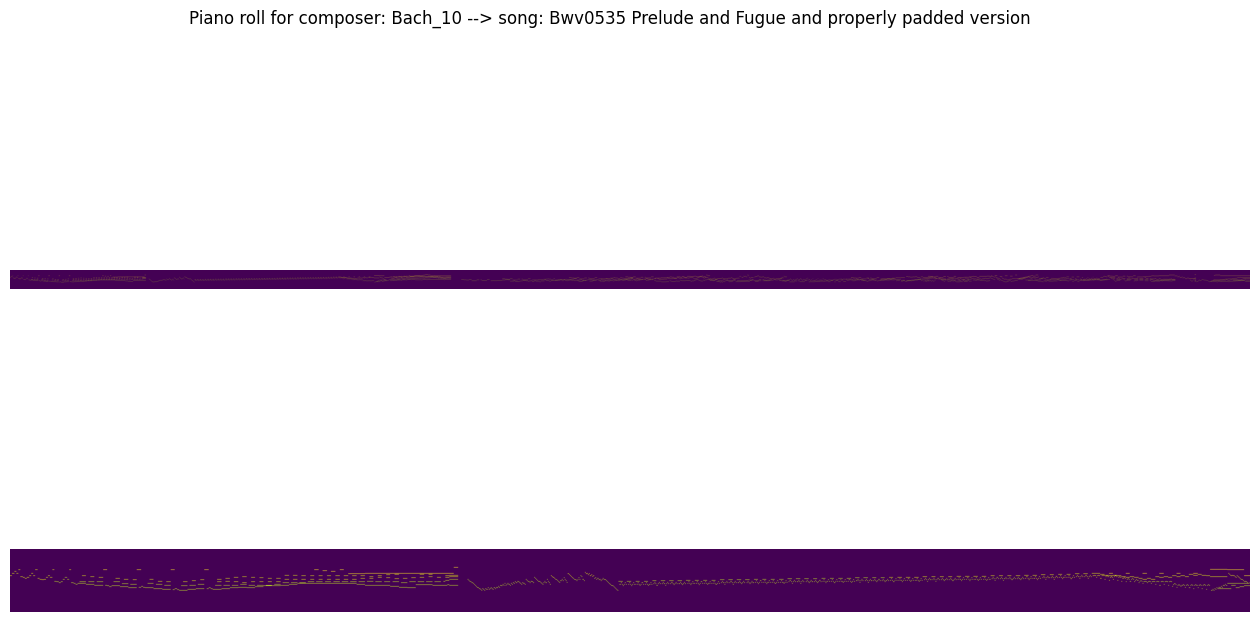

In [7]:
index = 10
fig = plt.figure(figsize=(16, 8))
fig.suptitle(f"Piano roll for composer: {list_composer_names[index]} --> song: {list_song_names[index]} and properly padded version")
fig.subplots_adjust(top = 0.8)
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(list_np_arrays[index], label = list_composer_names[index])
ax1.axis("off")

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(eq_piano_rolls[index], label = list_composer_names[index])
ax2.axis("off")

plt.show()
